In [ ]:
!pip install blocksnet ipykernel -q

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.6/56.6 kB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.6/63.6 kB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 35.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 277.8/277.8 kB 16.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 43.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 255.1/255.1 kB 10.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.3/14.3 MB 45.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.9/38.9 MB 15.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.6/9.6 MB 70.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 51.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 36.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.6/61.6 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━

In [ ]:
import osmnx as ox

In [ ]:
boundary = ox.geocode_to_gdf("Лаголовское сельское поселение, Ленинградская область")

<Axes: >

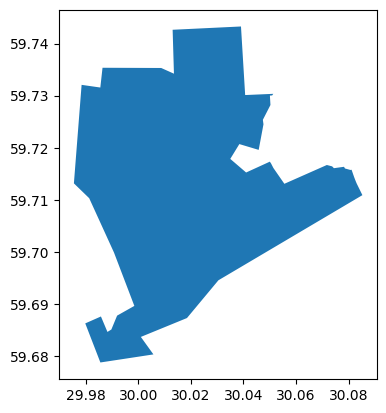

In [ ]:
boundary.plot()

In [ ]:
tags = {
    'roads': {
      "highway": ["construction","crossing","living_street","motorway","motorway_link","motorway_junction","pedestrian","primary","primary_link","raceway","residential","road","secondary","secondary_link","services","tertiary","tertiary_link","track","trunk","trunk_link","turning_circle","turning_loop","unclassified",],
      "service": ["living_street", "emergency_access"]
    },
    'railways': {
      "railway": "rail"
      },
    'water': {
      'riverbank':True,
      'reservoir':True,
      'basin':True,
      'dock':True,
      'canal':True,
      'pond':True,
      'natural':['water','bay'],
      'waterway':['river','canal','ditch'],
      'landuse':'basin',
      'water': 'lake'
    }
}

In [ ]:
water = ox.features_from_polygon(boundary.unary_union, tags['water'])
roads = ox.features_from_polygon(boundary.unary_union, tags['roads'])
try:
   railways = None
except Exception as e:
   railways = ox.features_from_polygon(boundary_2.unary_union, tags['railways'])

In [ ]:
local_crs = boundary.estimate_utm_crs()

In [ ]:
boundary = boundary.reset_index()[['geometry']].to_crs(local_crs)
water = water.reset_index()[['geometry']].to_crs(local_crs)
roads = roads.reset_index()[['geometry']].to_crs(local_crs)

In [ ]:
roads = roads[roads.geom_type.isin(['LineString', 'MultiLineString'])]

In [ ]:
from blocksnet import BlocksGenerator

bg = BlocksGenerator(boundary, roads, railways, water)

<frozen importlib._bootstrap>:914: ImportWarning: _PyDrive2ImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _PyDriveImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _GenerativeAIImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _OpenCVImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: APICoreClientInfoImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _BokehImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _AltairImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _PyDrive2ImportHook.find_spec() not found; falling back to find_module()
<frozen impo

2024-12-24 18:54:30.917 | INFO     | blocksnet.preprocessing.blocks_generator:__init__:99 - Check boundaries schema
<frozen importlib._bootstrap>:914: ImportWarning: _PyDrive2ImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _PyDriveImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _GenerativeAIImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _OpenCVImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: APICoreClientInfoImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _BokehImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _AltairImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._

In [ ]:
blocks = bg.run()

2024-12-24 18:54:38.085 | INFO     | blocksnet.preprocessing.blocks_generator:run:161 - Generating blocks
2024-12-24 18:54:38.100 | INFO     | blocksnet.preprocessing.blocks_generator:run:170 - Setting up enclosures
2024-12-24 18:54:38.134 | INFO     | blocksnet.preprocessing.blocks_generator:run:174 - Filling holes
2024-12-24 18:54:38.156 | INFO     | blocksnet.preprocessing.blocks_generator:run:178 - Dropping overlapping blocks
2024-12-24 18:54:38.181 | INFO     | blocksnet.preprocessing.blocks_generator:run:192 - Calculating blocks area
2024-12-24 18:54:38.190 | INFO     | blocksnet.preprocessing.blocks_generator:run:199 - Blocks generated


In [ ]:
!pip install mapclassify -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.1/59.1 kB 2.3 MB/s eta 0:00:00


In [ ]:
blocks.explore()

<frozen importlib._bootstrap>:914: ImportWarning: _PyDrive2ImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _PyDriveImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _GenerativeAIImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _OpenCVImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: APICoreClientInfoImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _BokehImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _AltairImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _PyDrive2ImportHook.find_spec() not found; falling back to find_module()
<frozen impo

<frozen importlib._bootstrap>:914: ImportWarning: _PyDrive2ImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _PyDriveImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _GenerativeAIImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _OpenCVImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: APICoreClientInfoImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _BokehImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _AltairImportHook.find_spec() not found; falling back to find_module()


In [ ]:
buildings = ox.features_from_polygon(boundary.to_crs(4326).unary_union, {'building': True})

In [ ]:
buildings

<frozen importlib._bootstrap>:914: ImportWarning: _PyDrive2ImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _PyDriveImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _GenerativeAIImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _OpenCVImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: APICoreClientInfoImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _BokehImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _AltairImportHook.find_spec() not found; falling back to find_module()


geometry  \
element_type osmid                                                            
node         9891937565                           POINT (30.00776 59.71447)   
             9891937566                           POINT (30.00841 59.71459)   
             9891937568                           POINT (30.00200 59.71471)   
             11879873715                          POINT (30.00663 59.72999)   
             11879873716                          POINT (30.00554 59.73019)   
...                                                                     ...   
way          1309507250   POLYGON ((29.99713 59.72954, 29.99701 59.72981...   
             1309507251   POLYGON ((29.99827 59.72897, 29.99794 59.72895...   
             1309507252   POLYGON ((29.99795 59.72997, 29.99806 59.72997...   
relation     5586597      POLYGON ((30.02125 59.69910, 30.02133 59.69910...   
             5586598      POLYGON ((30.02905 59.70446, 30.02920 59.70449...   

                          addr:city addr:housenumber       addr:street  \
element_type osmid                                                       
node         9891937565   Мухоловка                3  Счастливая улица   
             9891937566   Мухоловка                1  Счастливая улица   
             9891937568   Мухоловка               21     Полевая улица   
             11879873715        NaN               72               NaN   
             11879873716        NaN               69               NaN   
...                             ...              ...               ...   
way          1309507250         NaN              NaN               NaN   
             1309507251         NaN                5               NaN   
             1309507252         NaN              NaN               NaN   
relation     5586597            NaN              NaN               NaN   
             5586598       Лаголово                1               NaN   

                              building source               addr:place  \
element_type osmid                                                       
node         9891937565          house   bing                      NaN   
             9891937566          house   bing                      NaN   
             9891937568          house   bing                      NaN   
             11879873715      detached    NaN       ТСН Красносельское   
             11879873716      detached    NaN       ТСН Красносельское   
...                                ...    ...                      ...   
way          1309507250   construction    NaN                      NaN   
             1309507251   construction    NaN                      NaN   
             1309507252      warehouse    NaN                      NaN   
relation     5586597               yes    NaN                      NaN   
             5586598            office    NaN  Южная промышленная зона   

                                                                      nodes  \
element_type osmid                                                            
node         9891937565                                                 NaN   
             9891937566                                                 NaN   
             9891937568                                                 NaN   
             11879873715                                                NaN   
             11879873716                                                NaN   
...                                                                     ...   
way          1309507250   [12125692335, 12125692338, 12125692337, 121256...   
             1309507251   [12125692344, 12125692341, 12125692342, 121256...   
             1309507252   [12125692348, 12125692347, 12125692346, 121256...   
relation     5586597      [[[4970038200, 3787020765, 3787020554], [37870...   
             5586598      [[[3787021446, 3787021447, 3787021450, 3787021...   

                         abandoned building:cladding  ... product  \
element_type osm

In [ ]:
buildings = buildings.to_crs(local_crs).reset_index()[['geometry']]
buildings.geometry = buildings.representative_point()

In [ ]:
from blocksnet import BlocksSplitter

bs = BlocksSplitter(blocks, buildings)

In [ ]:
splitted_blocks = bs.run()

2024-12-24 18:55:10.431 | INFO     | blocksnet.preprocessing.blocks_splitter:run:167 - Joining buildings and blocks to exclude duplicates
2024-12-24 18:55:10.532 | INFO     | blocksnet.preprocessing.blocks_splitter:run:176 - Choosing blocks to be splitted
2024-12-24 18:55:10.553 | INFO     | blocksnet.preprocessing.blocks_splitter:run:185 - Splitting filtered blocks
  0%|          | 0/1 [00:00<?, ?it/s]Exception ignored on calling ctypes callback function: <function ThreadpoolController._find_libraries_with_dl_iterate_phdr.<locals>.match_library_callback at 0x7e3b97575f30>
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/threadpoolctl.py", line 1005, in match_library_callback
    self._make_controller_from_path(filepath)
  File "/usr/local/lib/python3.10/dist-packages/threadpoolctl.py", line 1175, in _make_controller_from_path
    lib_controller = controller_class(
  File "/usr/local/lib/python3.10/dist-packages/threadpoolctl.py", line 114, in __init__

In [ ]:
len(blocks), len(splitted_blocks)

(74, 77)

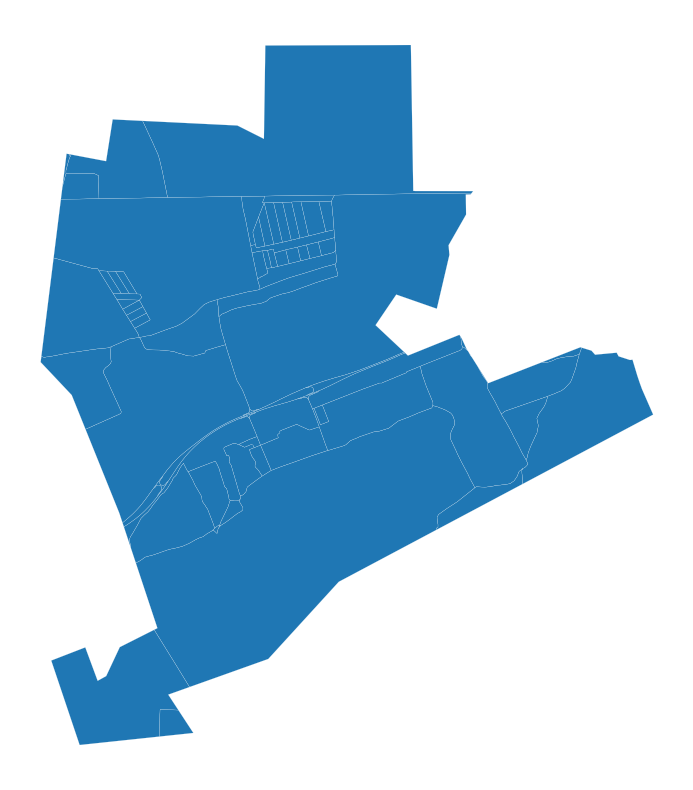

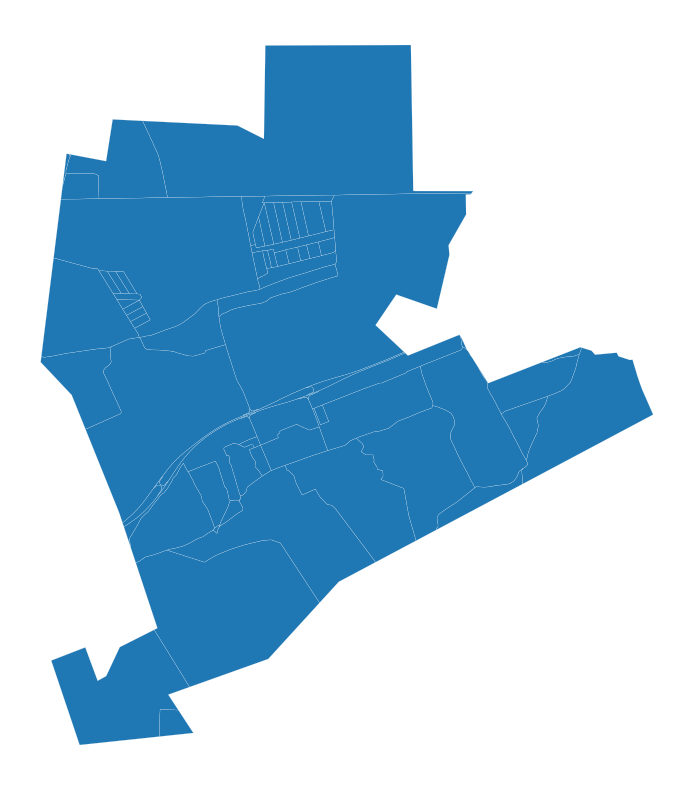

In [ ]:
blocks.plot(linewidth=0.1, figsize=(10,10)).set_axis_off()
splitted_blocks.plot(linewidth=0.1, figsize=(10,10)).set_axis_off()

In [ ]:
splitted_blocks.to_file('blocks.geojson')

<frozen importlib._bootstrap>:914: ImportWarning: _PyDrive2ImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _PyDriveImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _GenerativeAIImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _OpenCVImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: APICoreClientInfoImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _BokehImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _AltairImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _PyDrive2ImportHook.find_spec() not found; falling back to find_module()
<frozen impo